# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Stationary Random Processes

### Definition

When the statistical properties of a random process do not depend on the time index $k$, this process is termed as [*stationary random process*](https://en.wikipedia.org/wiki/Stationary_process). This can be expressed formally as

$$ E\{ f(x[k_1], x[k_2], \dots) \} = E\{ f(x[k_1 + \Delta], x[k_2 + \Delta], \dots) \}$$

where $\Delta \in \mathbb{Z}$ denotes an arbitrary (temporal) shift. From this definition it becomes clear that

* random signals of finite length and
* deterministic signals

cannot be stationary random processes in a strict sense. However, in practice it is often assumed to be sufficient if above condition holds within the finite length of a random signal.

### Cumulative Distribution Functions and Probability Density Functions

It follows from above definition of a stationary process, that the univariate cumulative distribution function (CDF) of a stationary random process does not depend on the time index $k$

$$P_x(\theta, k) = P_x(\theta)$$

the same holds for the univariate probability density function (PDF). The bivariate CDF of two stationary random signals $x[k]$ and $y[k]$ depends only on the difference $\kappa = k_x - k_y$

$$P_{xy}(\theta_x, \theta_y, k_x, k_y) = P_{xy}(\theta_x, \theta_y, \kappa)$$

The same holds for the bivariate PDF.

### First Order Ensemble Averages

For a first order ensemble average of a stationary process the following relation must hold

$$E\{ f(x[k]) \} = E\{ f(x[k + \Delta]) \}$$

hence it cannot depend on the time index $k$.

For the linear mean we consequently get 

$$\mu_x[k] = \mu_x$$ 

and for the variance 

$$\sigma_x^2[k] = \sigma_x^2$$

### Cross- and Auto-Correlation Function

Introducing the PDF's properties of a stationary process into the definition of the cross-correlation function (CCF) and auro-correlation function (ACF) it follows

$$\varphi_{xy}[k_x, k_y] = \varphi_{xy}[\kappa] = E\{ x[k] \cdot y[k-\kappa]\} = E\{ x[k+\kappa] \cdot y[k]\}$$

and

$$\varphi_{xx}[k_1, k_2] = \varphi_{xx}[\kappa] = E\{ x[k] \cdot x[k-\kappa]\} = E\{ x[k+\kappa] \cdot x[k]\}$$

## Weakly Stationary Random Process

### Definition

The definition of a stationary random process in the previous section must hold for any mapping function $f(\cdot)$. This cannot be checked in a strict sense for practical random processes. For a weakly (wide sense) stationary random process the conditions for stationarity must hold only for linear mappings. This leads to the following two conditions a weakly stationary random process has to fulfill

$$ E\{ x[k_1] \cdot x[k_2] \} = E\{ x[k_1 + \Delta] \cdot x[k_2 + \Delta] \}$$

and

$$ E\{ x[k] \} = E\{ x[k + \Delta] \}$$

A random signal of finite length cannot be weakly stationary in a strict sense.

### Example

From above definition of a weakly stationary process it is evident that is sufficient to check the time dependence of the linear mean $x_\mu[k]$ and the auto-correlation function $\varphi_{xx}[k_1, k_2]$ of a random process. Both quantities are calculated and plotted for two different random processes.

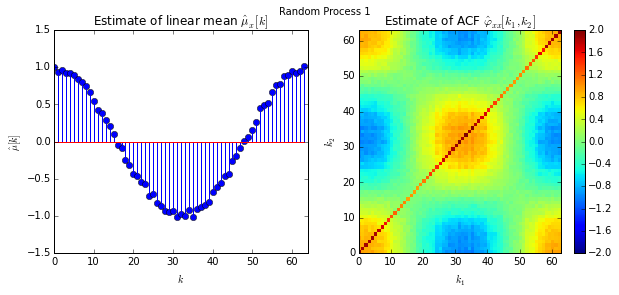

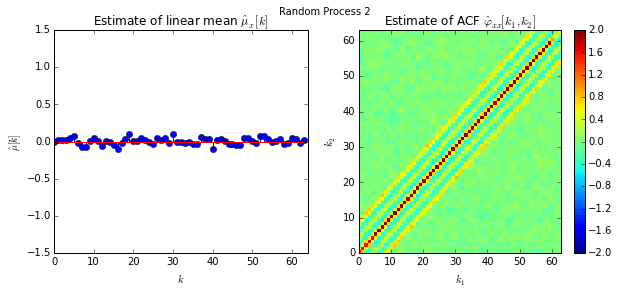

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

L = 64  # number of random samples
N = 1000  # number of sample functions

# generate sample functions
x = np.random.normal(size=(N, L))
x1 = x + np.tile(np.cos(2*np.pi/L*np.arange(L)), [N,1])
h = 2*np.fft.irfft([1,1,1,0,0,0])
x2 = np.asarray([np.convolve(x[n,:], h, mode='same') for n in range(N)])

# compute and plot results
def compute_plot_results(x):
    
    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # estimate the auto-correlation function
    acf = np.zeros((L, L))
    for n in range(L):
        for m in range(L):
            acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], 0)
    
    plt.subplot(121)
    plt.stem(mu)
    plt.title(r'Estimate of linear mean $\hat{\mu}_x[k]$')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, L, -1.5, 1.5])

    plt.subplot(122)
    plt.pcolor(np.arange(L), np.arange(L), acf, vmin=-2, vmax=2)
    plt.title(r'Estimate of ACF $\hat{\varphi}_{xx}[k_1, k_2]$')
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.colorbar()
    plt.autoscale(tight=True)

    
plt.figure(figsize = (10, 4))
plt.gcf().suptitle('Random Process 1')
compute_plot_results(x1)

plt.figure(figsize = (10, 4))
plt.gcf().suptitle('Random Process 2')
compute_plot_results(x2)

**Exercise**

* Which process can be assumed to be weakly stationary? Why?
* Increase the number `N` of sample functions. Do the results support your intial assumption? 

## Higher Order Temporal Averages

Ensemble averages are defined as the average across all sample functions $x_n[k]$ for particular time indexes. So far we did not consider temporal averaging to characterize a random signal. For a stationary process, the higher order temporal average along the $n$-th sample function is defined as

$$ \overline{ f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots) } = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots)$$

## Ergodic Random Processes

An [ergodic process](https://en.wikipedia.org/wiki/Ergodic_process) is a stationary random process whose higher order temporal averages of all sample functions are equal to the ensemble averages

$$ \overline{ f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots) } = E\{  f(x[k], x[k-\kappa_1], x[k-\kappa_2], \dots)  \} \;\; \forall n $$

This implies that all higher order temporal averages are equal. Any sample function from the process represents the average statistical properties of the entire process. The ensemble averages for a stationary and ergodic random process are given by the temporal averages of one sample function. This result is very important for the practical computation of statistical properties of random signals.

## Weakly Ergodic Random Processes

### Definition

As for a weakly stationary process, the conditions for ergodicity have to hold only for linear mappings $f(\cdot)$. Under the assumption of a weakly stationary process, the following two conditions have to be met by a weakly (wide sense) ergodic random process

$$ \overline{ x_n[k] \cdot x_n[k-\kappa] } = E\{  x[k] \cdot x[k-\kappa]  \} \;\; \forall n $$

and

$$ \overline{ x_n[k] } = E\{  x[k] \} \;\; \forall n $$

### Example

In the following example, the linear mean and autocorrelation function are computed as ensemble and temporal averages for three random processes. The plots show the estimated temporal averages $\hat{\mu}_{x,n}$ and $\hat{\varphi}_{xx,n}[\kappa]$ on the right side of the sample functions $x_n[k]$. Note, the linear mean as temporal average is a scalar value $\hat{\mu}_{x,n}$ which has been plotted by a bar plot. The ensemble averages $\hat{\mu}[k]$ and $\hat{\varphi}[k_1, k_2]$ are shown below the sample functions to indicate the averaging across sample functions.

In [2]:
L = 64  # number of random samples
N = 10000  # number of sample functions

# generate sample functions
x = np.random.normal(size=(N, L))
k = np.arange(L)
x1 = x + np.tile(np.cos(2*np.pi/L*k), [N, 1])
x2 = x + np.tile([np.ones(L), -np.ones(L)], [N//2, 1])
x3 = x + np.ones([N, L])

# function to compute and plot results
def compute_plot_results(x):
    
    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # estimate the auto-correlation function by ensemble average
    acf = np.zeros((L, L))
    for n in range(L):
        for m in range(L):
            acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], 0)
    # estimate linear mean as temporal average
    mut = 1/L * np.sum(x, 1)
    # estimate the auto-correlation function as temporal average
    acft = np.zeros((N, L))
    for n in range(N):
        acft[n, :] = np.correlate(x[n, :], x[n, :], mode='same')
    kappa = np.arange(L) - L//2
    
    for n in range(2):
        plt.figure(figsize = (10, 5))
        plt.subplot(131)
        plt.stem(x[n, :])
        plt.title(r'Sample function $x_%d[k]$'%n)
        plt.xlabel(r'$k$')
        plt.ylabel(r'$x_%d[k]$'%n)
        plt.axis([0, L, -4, 4])

        plt.subplot(132)
        plt.bar(-0.4, mut[n])
        plt.title(r'Linear mean $\hat{\mu}_{x,%d}$'%n)
        plt.ylabel(r'$\hat{\mu}_{x,%d}$'%n)
        plt.axis([-.5, .5, -1.5, 1.5])
        
        plt.subplot(133)
        plt.stem(kappa, acft[n, :])
        plt.title(r'Autocorrelation $\hat{\varphi}_{xx,%d}[\kappa]$'%n)
        plt.xlabel(r'$\kappa$')
        plt.ylabel(r'$\hat{\varphi}_{xx,%d}[\kappa]$'%n)
        plt.axis([-L//2, L//2, -30, 150])
    
    plt.figure(figsize = (10, 5))
    plt.subplot(131)
    plt.stem(mu)
    plt.title(r'Estimate of linear mean $\hat{\mu}_x[k]$')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, L, -1.5, 1.5])
    
    plt.figure(figsize = (4, 4))
    plt.pcolor(k, k, acf, vmin=-2, vmax=2)
    plt.title(r'Estimate of ACF $\hat{\varphi}_{xx}[k_1, k_2]$')
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.colorbar()
    plt.autoscale(tight=True)

**Random Process 1**

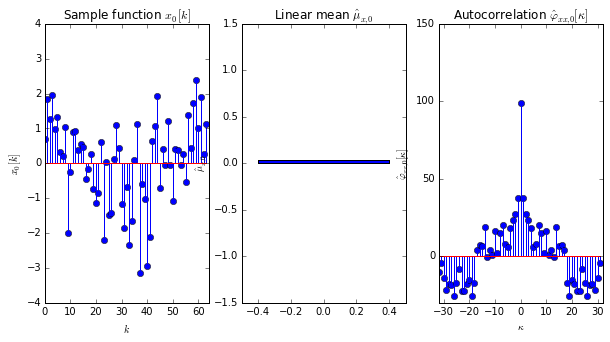

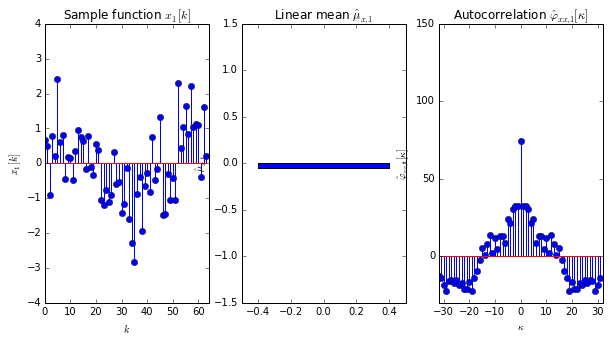

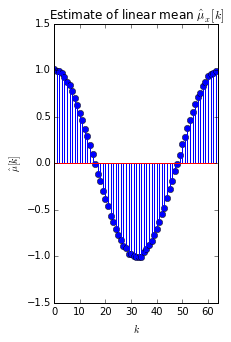

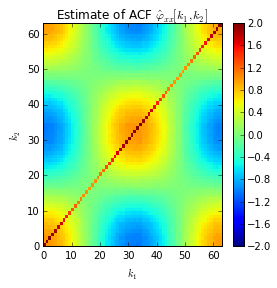

In [3]:
compute_plot_results(x1)

**Random Process 2**

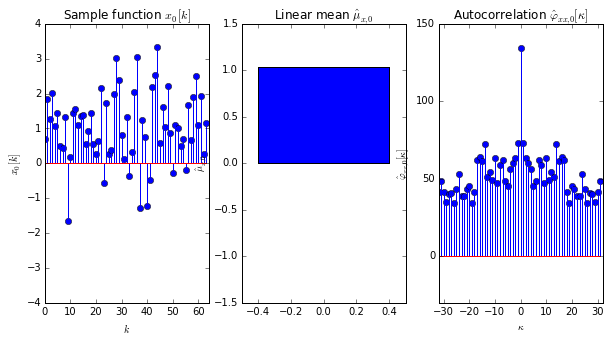

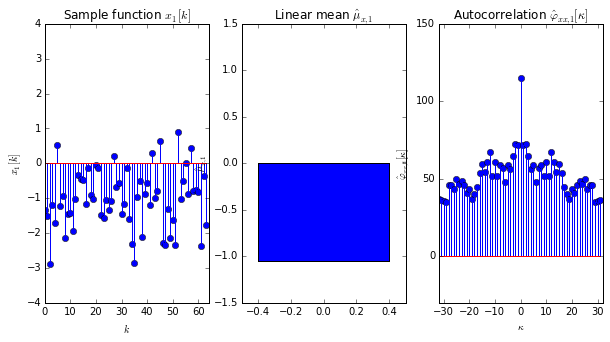

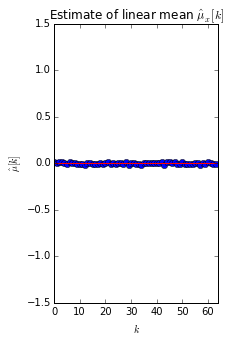

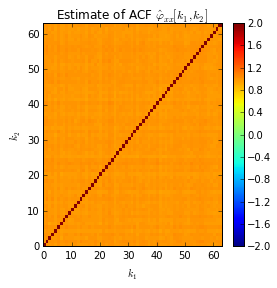

In [4]:
compute_plot_results(x2)

**Random Process 3**

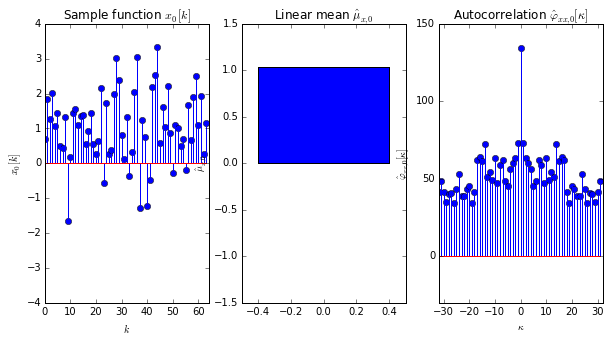

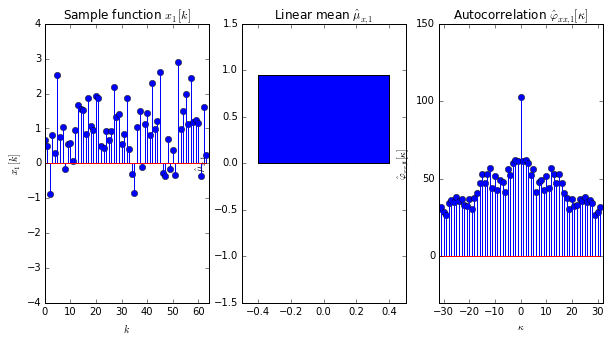

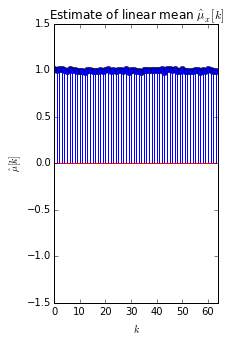

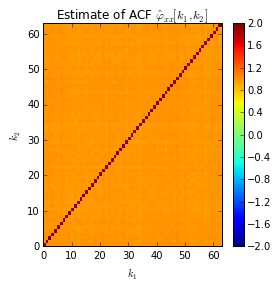

In [5]:
compute_plot_results(x3)

**Exercise**

* Which process can be assumed to be stationary and/or ergodic? Why?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>